# KNN from scratch

## KNN per la classificazione

In [22]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class KNNClassifier:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        # Calcolo le distanze tra ogni punto nel training set e il punto da prevedere nel test set
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Calcolo le distanze tra ogni punto nel training set e il punto da prevedere
        distances = np.sqrt(np.sum((self.X_train - x)**2, axis=1))

        # Ottengo i k punti più vicini
        k_indices = np.argsort(distances)[:self.k]

        # Ottengo le etichette dei k punti più vicini
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

In [23]:
# Creazione di un dataset casuale
X, y = make_classification(n_samples=1000, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Suddivisione in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestramento del modello
knn = KNNClassifier(k=3)
knn.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = knn.predict(X_test)

# Calcolo dell'accuratezza
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8866666666666667


Matrice di confusione:


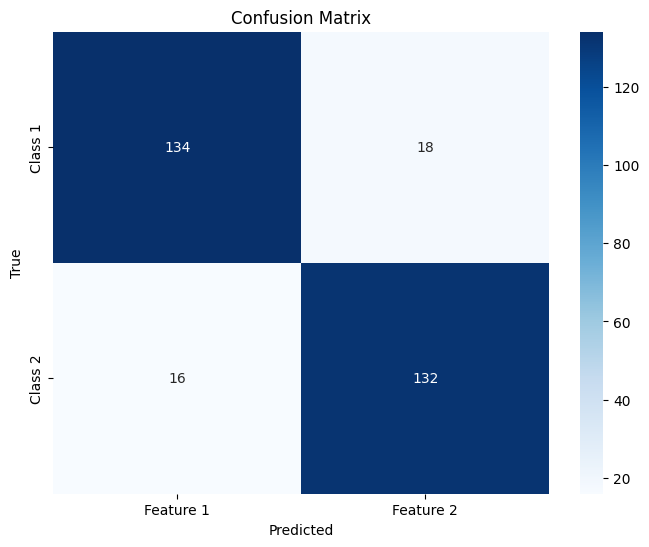

In [24]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Matrice di confusione
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matrice di confusione:')

# Visualizzazione della matrice di confusione tramite heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Feature 1", "Feature 2"], yticklabels=["Class 1", "Class 2"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

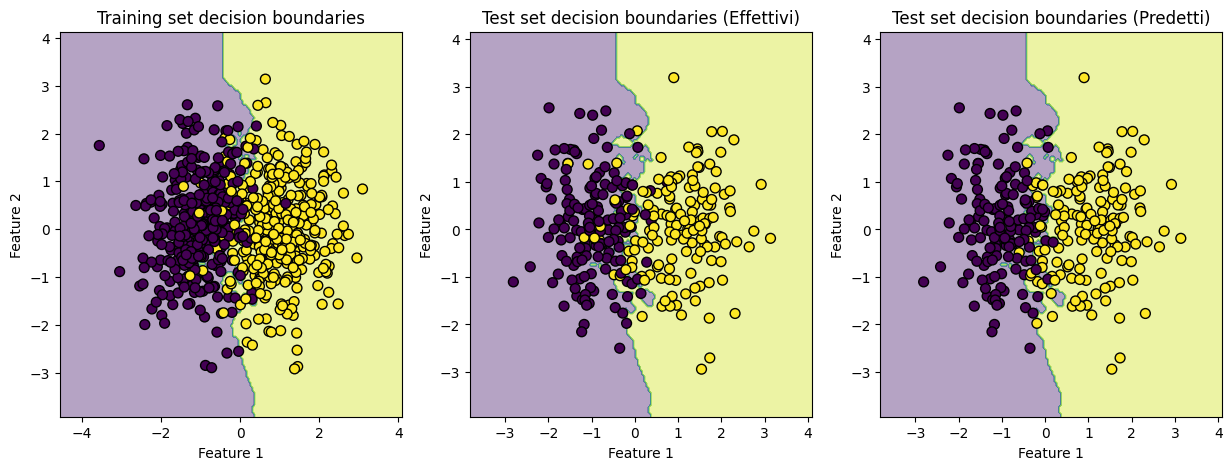

In [26]:
def plot_decision_boundaries(X, y, model, title, h=0.05):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = np.array([model._predict(np.array([xx_i, yy_i])) for xx_i, yy_i in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', s=50, cmap='viridis')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plot_decision_boundaries(X_train, y_train, knn, "Training set decision boundaries")

plt.subplot(1, 3, 2)
plot_decision_boundaries(X_test, y_test, knn, "Test set decision boundaries (Effettivi)")

plt.subplot(1, 3, 3)
plot_decision_boundaries(X_test, y_pred, knn, "Test set decision boundaries (Predetti)")

plt.show()

## KNN per la regressione

In [7]:
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

class KNNRegressor:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)

    def _predict(self, x):
        # Calcolare le distanze tra x e tutti i punti nel training set
        distances = [np.linalg.norm(x - x_train) for x_train in self.X_train]
        # Ottenere i k punti più vicini
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Restituire la media dei vicini
        return np.mean(k_nearest_labels)

In [11]:
# Creazione di un dataset casuale per la regressione
X, y = make_regression(n_samples=1000, n_features=2, noise=0.1, n_informative=1, random_state=42)

# Suddivisione in training set e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Addestramento del modello
knn_regressor = KNNRegressor(k=3)
knn_regressor.fit(X_train, y_train)

# Previsione sui dati di test
y_pred = knn_regressor.predict(X_test)

# Calcolo dell'errore medio quadratico
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calcolo dell'errore assoluto medio percentile
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Squared Error: 8.85
Mean Absolute Error: 1.83


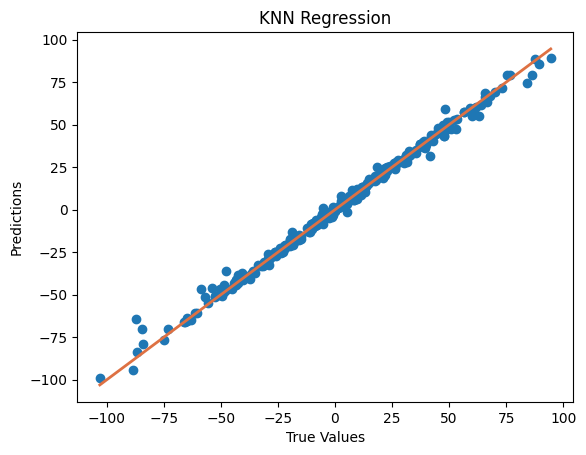

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizzazione dei risultati
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#de7143', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('KNN Regression')
plt.show()

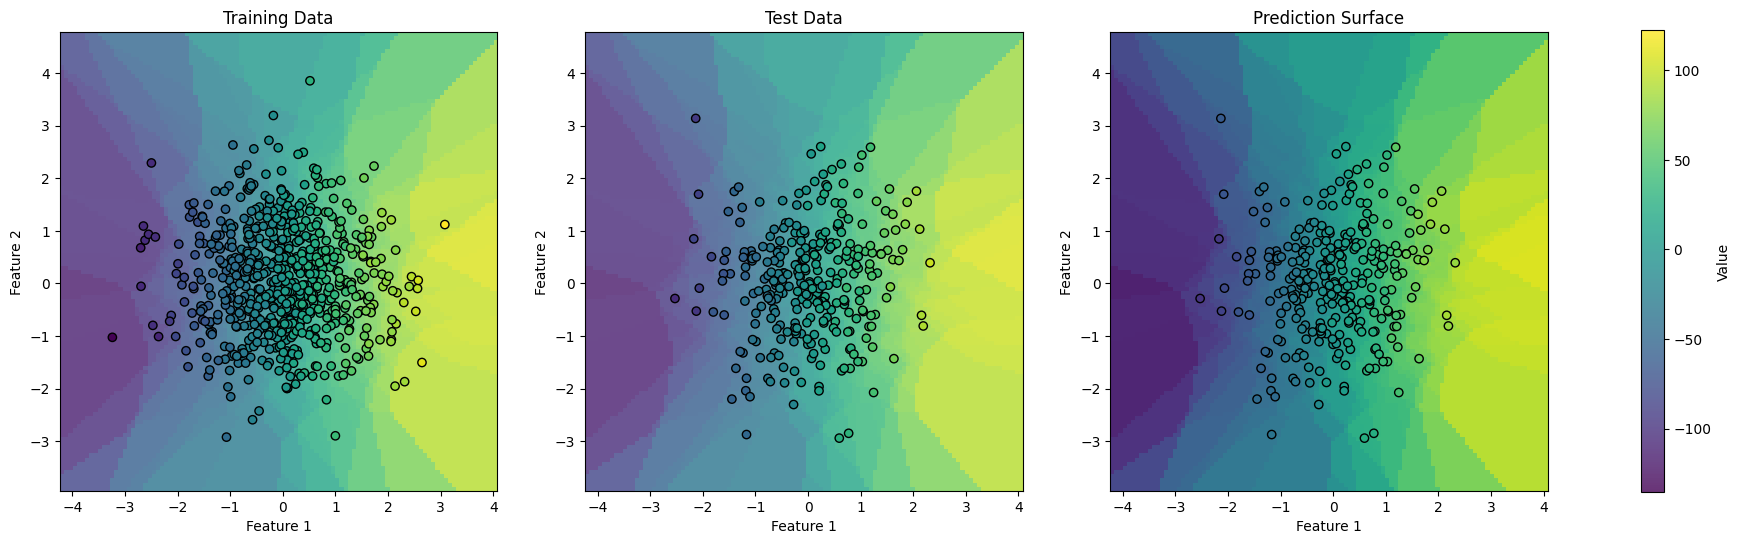

In [64]:
# Creazione di una griglia di punti
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.08),
                     np.arange(x2_min, x2_max, 0.08))

# Predizione sulla griglia
Z = knn_regressor.predict(np.c_[x1.ravel(), x2.ravel()])
Z = Z.reshape(x1.shape)

# Creazione dei subplot
fig, axs = plt.subplots(1, 3, figsize=(24, 6))

# Impostazione dei limiti per la colorbar
vmin = min(y.min(), Z.min(), y_pred.min())
vmax = max(y.max(), Z.max(), y_pred.max())

# Visualizzazione della heatmap continua
# Training Data
axs[0].imshow(Z, extent=[x1.min(), x1.max(), x2.min(), x2.max()],
               origin='lower', cmap='viridis', vmin=vmin, vmax=vmax, alpha=0.8)
sc_train = axs[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='viridis', vmin=vmin, vmax=vmax)
axs[0].set_title('Training Data')
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

# Test Data
axs[1].imshow(Z, extent=[x1.min(), x1.max(), x2.min(), x2.max()],
               origin='lower', cmap='viridis', vmin=vmin, vmax=vmax, alpha=0.8)
sc_test = axs[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='k', cmap='viridis', vmin=vmin, vmax=vmax)
axs[1].set_title('Test Data')
axs[1].set_xlabel('Feature 1')
axs[1].set_ylabel('Feature 2')

# Prediction Surface
axs[2].imshow(Z, extent=[x1.min(), x1.max(), x2.min(), x2.max()],
               origin='lower', cmap='viridis', vmin=vmin, vmax=vmax, alpha=0.8)
sc_pred = axs[2].scatter(X_test[:, 0], X_test[:, 1], c=y_pred, edgecolor='k', cmap='viridis', vmin=vmin, vmax=vmax)
axs[2].set_title('Prediction Surface')
axs[2].set_xlabel('Feature 1')
axs[2].set_ylabel('Feature 2')

# Aggiunta della colorbar comune
fig.colorbar(axs[2].imshow(Z, extent=[x1.min(), x1.max(), x2.min(), x2.max()],
                            origin='lower', cmap='viridis', vmin=vmin, vmax=vmax, alpha=0.8),
             ax=axs, orientation='vertical', label='Value')

plt.show()